In [1]:
from template_configurations.qiskit.gate_level import (
    q_env_config as gate_q_env_config,
    circuit_context,
)

/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


Circuit context global phase: π/2
                                           ┌───┐                              »
      q_1 -> 0 ────────────────────────────┤ X ├──────────────────────────────»
               ┌─────────┐┌────┐┌─────────┐└─┬─┘                              »
      q_0 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────■───────────────────■────■──»
               └─────────┘└────┘└─────────┘       │                   │  ┌─┴─┐»
      q_4 -> 2 ───────────────────────────────────┼───────────────────┼──┤ X ├»
                                                ┌─┴─┐┌───┐     ┌───┐┌─┴─┐└───┘»
      q_2 -> 3 ─────────────────────────────────┤ X ├┤ X ├──■──┤ X ├┤ X ├─────»
                                                └───┘└─┬─┘  │  └─┬─┘└───┘     »
ancilla_0 -> 4 ────────────────────────────────────────┼────┼────┼────────────»
                                                       │  ┌─┴─┐  │            »
      q_3 -> 5 ────────────────────────────────────────■──┤ X ├──■────────────»
      

In [2]:
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from gymnasium.wrappers import RescaleAction, ClipAction

In [3]:
q_env = QuantumEnvironment(gate_q_env_config)
# from qiskit.primitives import Estimator

# q_env = ContextAwareQuantumEnvironment(
#     gate_q_env_config, circuit_context, training_steps_per_gate=250
# )
# q_env.estimator = Estimator()
rescaled_env = RescaleAction(ClipAction(q_env), -1.0, 1.0)

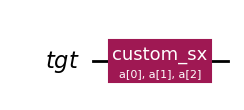

In [4]:
q_env.circuit_truncations[0].draw("mpl")

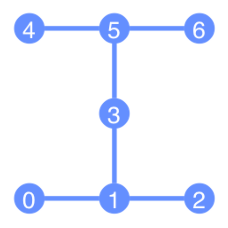

In [5]:
from qiskit.visualization import plot_gate_map

plot_gate_map(q_env.backend)

In [6]:
import yaml

with open(
        "/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/agent_config.yaml",
        "r",
) as f:
    agent_config = yaml.safe_load(f)

In [7]:
from ppo import CustomPPO

ppo_agent = CustomPPO(agent_config, rescaled_env)

In [8]:
ppo_agent.train(total_updates=500, print_debug=True, num_prints=40)

/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 64%|██████▍   | 320/500 [01:59<01:02,  2.87it/s]

Average gate fidelity of last gate: 0.9913291471017026
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 64%|██████▍   | 321/500 [02:00<01:10,  2.55it/s]

Avg gate fidelity: 0.991324533582949
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'X'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5482,  0.5421, -0.4766])
sigma tensor([0.0154, 0.0158, 0.0163])
DFE Rewards Mean: 0.4964230655240889
DFE Rewards standard dev 0.00561916358814367
Returns Mean: 0.6860807
Returns standard dev 0.011117635
Advantages Mean: -0.0045334343
Advantages standard dev 0.011117635
Average gate fidelity of last gate: 0.991324533582949
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 64%|██████▍   | 322/500 [02:00<01:05,  2.72it/s]

Avg gate fidelity: 0.9777755993116892
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Z'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5913,  0.5615, -0.5168])
sigma tensor([0.0166, 0.0179, 0.0125])
DFE Rewards Mean: 0.48887019104343155
DFE Rewards standard dev 0.010857949059332428
Returns Mean: 0.6713567
Returns standard dev 0.021199875
Advantages Mean: 0.012691336
Advantages standard dev 0.021199875
Average gate fidelity of last gate: 0.9777755993116892
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 65%|██████▍   | 323/500 [02:01<01:01,  2.86it/s]

Avg gate fidelity: 0.9922368944934766
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'X'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5487,  0.5302, -0.4692])
sigma tensor([0.0171, 0.0180, 0.0181])
DFE Rewards Mean: 0.497563222817471
DFE Rewards standard dev 0.004886646633952034
Returns Mean: 0.68833244
Returns standard dev 0.009686417
Advantages Mean: -0.004591877
Advantages standard dev 0.009686417
Average gate fidelity of last gate: 0.9922368944934766
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 65%|██████▍   | 324/500 [02:01<01:11,  2.46it/s]

Avg gate fidelity: 0.9933926855841423
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'X'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5503,  0.5249, -0.4822])
sigma tensor([0.0161, 0.0177, 0.0185])
DFE Rewards Mean: 0.49880544353667877
DFE Rewards standard dev 0.0041010927803441614
Returns Mean: 0.6907942
Returns standard dev 0.008158167
Advantages Mean: 0.00047567696
Advantages standard dev 0.008158168
Average gate fidelity of last gate: 0.9933926855841423
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 65%|██████▌   | 325/500 [02:01<01:06,  2.63it/s]

Avg gate fidelity: 0.9931047175911385
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'X'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5499,  0.5239, -0.4911])
sigma tensor([0.0166, 0.0162, 0.0186])
DFE Rewards Mean: 0.49875590967018457
DFE Rewards standard dev 0.003941783933683115
Returns Mean: 0.69069296
Returns standard dev 0.007854648
Advantages Mean: -0.0002502799
Advantages standard dev 0.007854648
Average gate fidelity of last gate: 0.9931047175911385
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 65%|██████▌   | 326/500 [02:02<01:02,  2.78it/s]

Avg gate fidelity: 0.9689992513734791
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])
Finished Estimator job
mean tensor([-0.4571,  0.4460, -0.3850])
sigma tensor([0.0189, 0.0164, 0.0338])
DFE Rewards Mean: 0.4931458487289969
DFE Rewards standard dev 0.008289542225530546
Returns Mean: 0.67966527
Returns standard dev 0.01631243
Advantages Mean: -0.044069476
Advantages standard dev 0.01631243
Average gate fidelity of last gate: 0.9689992513734791
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 65%|██████▌   | 327/500 [02:02<00:59,  2.91it/s]

Avg gate fidelity: 0.9782490418881614
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Z'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5929,  0.5365, -0.5534])
sigma tensor([0.0158, 0.0166, 0.0127])
DFE Rewards Mean: 0.48713607529134473
DFE Rewards standard dev 0.011998880425906244
Returns Mean: 0.6680173
Returns standard dev 0.02332788
Advantages Mean: 0.046873793
Advantages standard dev 0.023327878
Average gate fidelity of last gate: 0.9782490418881614
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 66%|██████▌   | 328/500 [02:03<01:08,  2.53it/s]

Avg gate fidelity: 0.9946240869757653
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Y'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5127,  0.4811, -0.4612])
sigma tensor([0.0180, 0.0155, 0.0244])
DFE Rewards Mean: 0.49889508414638345
DFE Rewards standard dev 0.0036351769024297047
Returns Mean: 0.69096607
Returns standard dev 0.007244569
Advantages Mean: -0.016829628
Advantages standard dev 0.007244569
Average gate fidelity of last gate: 0.9946240869757653
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 66%|██████▌   | 329/500 [02:03<01:03,  2.70it/s]

Avg gate fidelity: 0.976151184641721
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])
Finished Estimator job
mean tensor([-0.4594,  0.4508, -0.4052])
sigma tensor([0.0188, 0.0162, 0.0338])
DFE Rewards Mean: 0.4944749836064847
DFE Rewards standard dev 0.0071786990635118305
Returns Mean: 0.68225825
Returns standard dev 0.014165634
Advantages Mean: -0.012702286
Advantages standard dev 0.014165634
Average gate fidelity of last gate: 0.976151184641721
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 66%|██████▌   | 330/500 [02:03<00:59,  2.85it/s]

Avg gate fidelity: 0.9759167005495627
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])
Finished Estimator job
mean tensor([-0.4635,  0.4516, -0.4036])
sigma tensor([0.0172, 0.0155, 0.0334])
DFE Rewards Mean: 0.4948617235920142
DFE Rewards standard dev 0.006877366043356328
Returns Mean: 0.68301535
Returns standard dev 0.013572102
Advantages Mean: -0.0025707306
Advantages standard dev 0.013572102
Average gate fidelity of last gate: 0.9759167005495627
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 66%|██████▌   | 331/500 [02:04<01:07,  2.51it/s]

Avg gate fidelity: 0.9767665930267848
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Y'],
              coeffs=[ 0.25+0.j, -0.25+0.j])
Finished Estimator job
mean tensor([-0.4636,  0.4568, -0.4010])
sigma tensor([0.0171, 0.0144, 0.0324])
DFE Rewards Mean: 0.4955028784438509
DFE Rewards standard dev 0.007112604964441681
Returns Mean: 0.6842923
Returns standard dev 0.014081356
Advantages Mean: 0.0034118178
Advantages standard dev 0.014081356
Average gate fidelity of last gate: 0.9767665930267848
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 66%|██████▋   | 332/500 [02:04<01:02,  2.69it/s]

Avg gate fidelity: 0.99429758947956
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'X'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5505,  0.5059, -0.4993])
sigma tensor([0.0170, 0.0155, 0.0193])
DFE Rewards Mean: 0.4990357212658596
DFE Rewards standard dev 0.0029822789301602913
Returns Mean: 0.69123805
Returns standard dev 0.0059132515
Advantages Mean: 0.049794726
Advantages standard dev 0.0059132515
Average gate fidelity of last gate: 0.99429758947956
Starting benchmarking...
Starting simulation benchmark...


/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.circuit_fidelity_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.circuit_fidelity_history` for environment variables or `env.get_wrapper_attr('circuit_fidelity_history')` that will search the reminding wrappers.
  logger.warn(
 67%|██████▋   | 333/500 [02:04<00:58,  2.84it/s]

Avg gate fidelity: 0.9930641723705806
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Y'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job
mean tensor([-0.5149,  0.4804, -0.4529])
sigma tensor([0.0170, 0.0136, 0.0236])
DFE Rewards Mean: 0.49848875164146256
DFE Rewards standard dev 0.0036948882900145505
Returns Mean: 0.69015634
Returns standard dev 0.0073611774
Advantages Mean: -0.024393428
Advantages standard dev 0.0073611774
Average gate fidelity of last gate: 0.9930641723705806
Starting benchmarking...
Starting simulation benchmark...


 67%|██████▋   | 333/500 [02:05<01:02,  2.66it/s]

Avg gate fidelity: 0.9826215182406843
Finished simulation benchmark
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['I', 'Z'],
              coeffs=[0.25+0.j, 0.25+0.j])
Finished Estimator job


KeyboardInterrupt: 

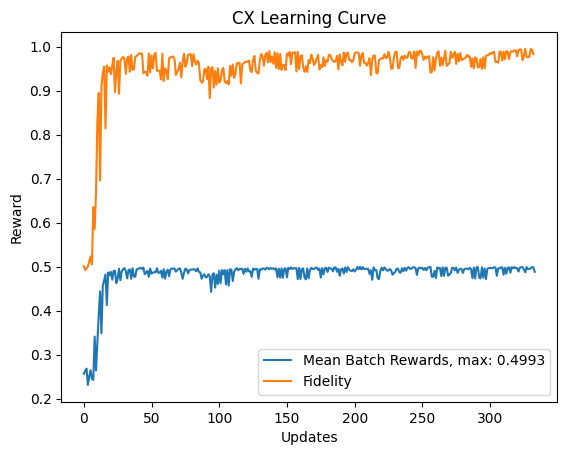

In [9]:
import numpy as np
import matplotlib.pyplot as plt

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4

plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean}")
plt.plot(q_env.avg_fidelity_history, label="Fidelity")
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title("CX Learning Curve")
plt.legend()
plt.show()

In [12]:
q_env.reward_history[-1]

array([0.98577215, 0.98269161, 0.9770032 , 1.00381589, 0.99464816,
       0.99614199, 0.99388827, 0.9908762 , 1.00032835, 0.96701994,
       1.0012544 , 0.99035181, 0.99011019, 0.99099242, 0.98197096,
       0.99724645, 0.98640712, 0.9975815 , 0.99622847, 0.96367083,
       0.98645437, 0.9745653 , 0.99259415, 0.99695726, 1.0083116 ,
       0.99515677, 1.00002689, 0.99713967, 1.00542447, 0.96345547,
       1.01316043, 0.97839209, 1.01126469, 0.99474219, 0.97356848,
       0.98854963, 0.99873406, 0.98964519, 0.99328275, 0.96579673,
       0.99297023, 0.99002227, 0.98757819, 0.98402543, 0.97717181,
       0.98910435, 0.97219712, 1.00254252, 1.00062845, 1.00911881,
       0.99898141, 0.98583234, 0.99821034, 0.99831515, 0.97257491,
       0.99818424, 0.98088215, 0.9538733 , 0.98843683, 0.99766243,
       0.984397  , 0.9984744 , 1.00886698, 0.98966858, 0.95525611,
       0.9862518 , 0.97311731, 0.99196584, 1.00047605, 0.99574317,
       0.99634192, 0.9693134 , 0.97981102, 1.0078596 , 1.00125